In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime
import random
import requests
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
coordinates = list(lat_lngs)
lat_lngs

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
   
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)


628

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b1e1c78de47f356c6a289cc8322f3a30


In [7]:
# Create an empty list to hold the weather data.
city_data = list()
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
  # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {cities[i]}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": cities[i],
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | karaul
City not found. Skipping...
Processing Record 3 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 1 | vostok
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | tiznit
Processing Record 7 of Set 1 | te anau
Processing Record 8 of Set 1 | lagos
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | lompoc
Processing Record 11 of Set 1 | pudozh
Processing Record 12 of Set 1 | twentynine palms
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | wallaceburg
Processing Record 16 of Set 1 | nyurba
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | manado
Processing Record 20 of Set 1 | guelengdeng
City not found. Skipping...
Processing Record 21 of Set 1 | mar

Processing Record 36 of Set 4 | souillac
Processing Record 37 of Set 4 | estevan
Processing Record 38 of Set 4 | marawi
Processing Record 39 of Set 4 | wenling
Processing Record 40 of Set 4 | stulovo
Processing Record 41 of Set 4 | tura
Processing Record 42 of Set 4 | port elizabeth
Processing Record 43 of Set 4 | broome
Processing Record 44 of Set 4 | canton
Processing Record 45 of Set 4 | kenai
Processing Record 46 of Set 4 | keti bandar
Processing Record 47 of Set 4 | shitanjing
Processing Record 48 of Set 4 | crab hill
City not found. Skipping...
Processing Record 49 of Set 4 | dali
Processing Record 50 of Set 4 | rio grande
Processing Record 1 of Set 5 | isangel
Processing Record 2 of Set 5 | mazagao
Processing Record 3 of Set 5 | quatre cocos
Processing Record 4 of Set 5 | nelson bay
Processing Record 5 of Set 5 | khash
Processing Record 6 of Set 5 | pisco
Processing Record 7 of Set 5 | harper
Processing Record 8 of Set 5 | bengkulu
Processing Record 9 of Set 5 | borba
Processing

City not found. Skipping...
Processing Record 29 of Set 8 | ichinohe
Processing Record 30 of Set 8 | nantucket
Processing Record 31 of Set 8 | ponta delgada
Processing Record 32 of Set 8 | champerico
Processing Record 33 of Set 8 | yeppoon
Processing Record 34 of Set 8 | kruisfontein
Processing Record 35 of Set 8 | hami
Processing Record 36 of Set 8 | ramgarh
Processing Record 37 of Set 8 | saint-joseph
Processing Record 38 of Set 8 | quelimane
Processing Record 39 of Set 8 | thompson
Processing Record 40 of Set 8 | sorong
Processing Record 41 of Set 8 | ambulu
Processing Record 42 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 43 of Set 8 | neyshabur
Processing Record 44 of Set 8 | hasaki
Processing Record 45 of Set 8 | lasa
Processing Record 46 of Set 8 | vista hermosa
Processing Record 47 of Set 8 | kavaratti
Processing Record 48 of Set 8 | wembley
Processing Record 49 of Set 8 | viligili
City not found. Skipping...
Processing Record 50 of Set 8 | takoradi
Pro

Processing Record 17 of Set 12 | nemyriv
Processing Record 18 of Set 12 | haibowan
City not found. Skipping...
Processing Record 19 of Set 12 | brookings
Processing Record 20 of Set 12 | tilichiki
Processing Record 21 of Set 12 | lavrentiya
Processing Record 22 of Set 12 | cayenne
Processing Record 23 of Set 12 | nguruka
Processing Record 24 of Set 12 | zhuanghe
Processing Record 25 of Set 12 | agirish
Processing Record 26 of Set 12 | jubayl
City not found. Skipping...
Processing Record 27 of Set 12 | kingaroy
Processing Record 28 of Set 12 | atambua
Processing Record 29 of Set 12 | mercedes
Processing Record 30 of Set 12 | urusha
Processing Record 31 of Set 12 | brae
Processing Record 32 of Set 12 | ambon
Processing Record 33 of Set 12 | tecpan
Processing Record 34 of Set 12 | ternate
Processing Record 35 of Set 12 | constantine
Processing Record 36 of Set 12 | perelyub
Processing Record 37 of Set 12 | amahai
Processing Record 38 of Set 12 | zhuhai
Processing Record 39 of Set 12 | van

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,90.01,48,17,8.99,US,2022-07-21 23:30:46
1,vostok,46.4856,135.8833,62.08,97,99,1.39,RU,2022-07-21 23:30:25
2,ushuaia,-54.8000,-68.3000,31.66,86,75,28.77,AR,2022-07-21 23:30:50
3,tiznit,29.5833,-9.5000,88.20,21,22,3.09,MA,2022-07-21 23:30:50
4,te anau,-45.4167,167.7167,39.22,91,67,1.21,NZ,2022-07-21 23:28:15
5,lagos,6.5833,3.7500,75.49,84,98,5.44,NG,2022-07-21 23:30:08
6,butaritari,3.0707,172.7902,81.48,73,57,5.41,KI,2022-07-21 23:29:34
7,lompoc,34.6391,-120.4579,88.02,72,0,17.00,US,2022-07-21 23:30:52
8,pudozh,61.8099,36.5345,63.23,79,60,3.53,RU,2022-07-21 23:25:52
9,twentynine palms,34.1356,-116.0542,110.86,13,71,10.27,US,2022-07-21 23:30:52


In [9]:
city_data_df = city_data_df.reindex(columns = ['City',
                           'Country',
                           'Date',
                           'Lat',
                           'Lng',
                           'Max Temp',
                           'Humidity',
                           'Cloudiness',
                           'Wind Speed'])
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,albany,US,2022-07-21 23:30:46,42.6001,-73.9662,90.01,48,17,8.99
1,vostok,RU,2022-07-21 23:30:25,46.4856,135.8833,62.08,97,99,1.39
2,ushuaia,AR,2022-07-21 23:30:50,-54.8000,-68.3000,31.66,86,75,28.77
3,tiznit,MA,2022-07-21 23:30:50,29.5833,-9.5000,88.20,21,22,3.09
4,te anau,NZ,2022-07-21 23:28:15,-45.4167,167.7167,39.22,91,67,1.21
5,lagos,NG,2022-07-21 23:30:08,6.5833,3.7500,75.49,84,98,5.44
6,butaritari,KI,2022-07-21 23:29:34,3.0707,172.7902,81.48,73,57,5.41
7,lompoc,US,2022-07-21 23:30:52,34.6391,-120.4579,88.02,72,0,17.00
8,pudozh,RU,2022-07-21 23:25:52,61.8099,36.5345,63.23,79,60,3.53
9,twentynine palms,US,2022-07-21 23:30:52,34.1356,-116.0542,110.86,13,71,10.27


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file)

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

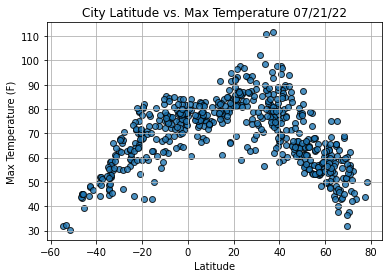

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

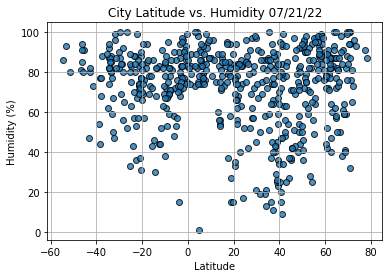

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

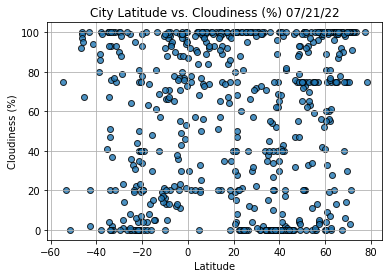

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

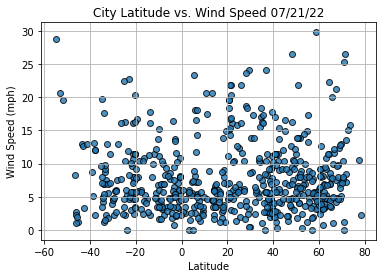

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

IndentationError: expected an indented block (755688848.py, line 3)

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                       nyurba
Country                        RU
Date          2022-07-21 23:30:53
Lat                       63.2842
Lng                      118.3319
Max Temp                    58.95
Humidity                       83
Cloudiness                    100
Wind Speed                   5.19
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
575     True
576     True
577     True
578     True
579     True
Name: Lat, Length: 580, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,albany,US,2022-07-21 23:30:46,42.6001,-73.9662,90.01,48,17,8.99
1,vostok,RU,2022-07-21 23:30:25,46.4856,135.8833,62.08,97,99,1.39
3,tiznit,MA,2022-07-21 23:30:50,29.5833,-9.5000,88.20,21,22,3.09
5,lagos,NG,2022-07-21 23:30:08,6.5833,3.7500,75.49,84,98,5.44
6,butaritari,KI,2022-07-21 23:29:34,3.0707,172.7902,81.48,73,57,5.41


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

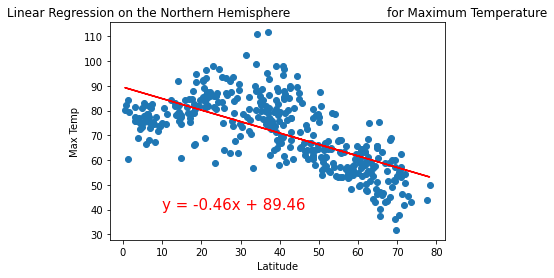

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

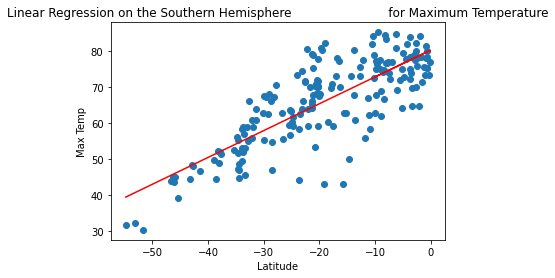

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

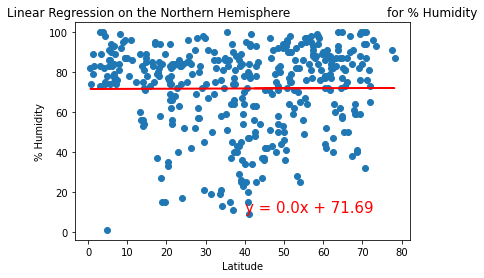

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

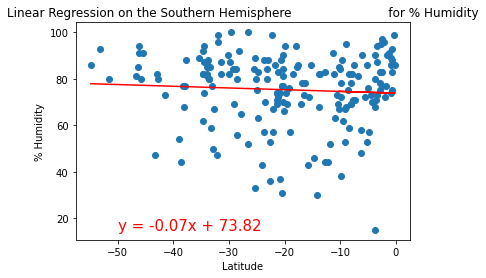

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

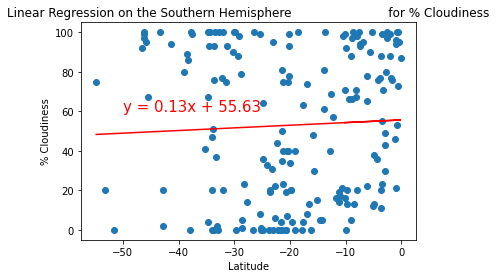

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


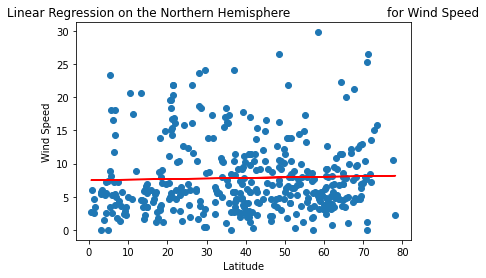

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

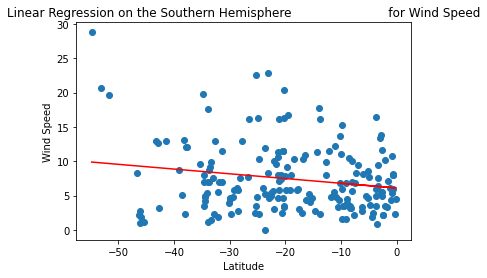

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))